In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
patient = pd.read_excel("Patient List.xlsx")
office_list = pd.read_excel("Office List.xlsx")
office_list = office_list.drop(['Internal Office Name', 'Zip Code'], axis=1)

In [3]:
patient.rename(columns = {'Patient Home Office ID':'Office ID'}, inplace = True)
patient = patient.merge(office_list, on='Office ID', how = 'left')

In [4]:
patient = patient[patient["Office Name"].str.contains("Gentle Dental")]
patient["Office Name"].unique()

array(['Gentle Dental Brookline', 'Gentle Dental Wakefield',
       'Gentle Dental Burlington', 'Gentle Dental Newbury Street',
       'Gentle Dental Cambridge', 'Gentle Dental Medford',
       'Gentle Dental Saugus', 'Gentle Dental Brockton',
       'Gentle Dental West Roxbury', 'Gentle Dental South Boston',
       'Gentle Dental Norwood', 'Gentle Dental Malden',
       'Gentle Dental Quincy', 'Gentle Dental Braintree',
       'Gentle Dental Newton', 'Gentle Dental Stoughton',
       'Gentle Dental Jamaica Plain', 'Gentle Dental Natick',
       'Gentle Dental Somerville', 'Gentle Dental Seekonk',
       'Gentle Dental Hudson', 'Gentle Dental Waltham',
       'Gentle Dental Arlington', 'Gentle Dental Franklin',
       'Gentle Dental Worcester At The Trolley Yard',
       'Gentle Dental Brighton', 'Gentle Dental Nashua',
       'Gentle Dental North Andover', 'Gentle Dental Methuen',
       'Gentle Dental Worcester', 'Gentle Dental Belmont',
       'Gentle Dental Peabody', 'Gentle Dental

In [5]:
patient["Patient Home Office Name"].unique()

array(['Brookline', 'Wakefield', 'Burlington', 'Newbury', 'Cambridge',
       'Medford', 'Saugus', 'Brockton', 'WestRoxbury', 'SouthBoston',
       'Norwood', 'Malden', 'Quincy', 'Braintree', 'Newton', 'Stoughton',
       'JamaicaPlain', 'Natick', 'Somerville', 'Seekonk', 'Hudson',
       'Waltham', 'Arlington', 'Franklin', 'TrolleyYard', 'Brighton',
       'Nashua', 'NorthAndover', 'Methuen', 'Worcester', 'Belmont',
       'Peabody', 'Beverly', 'Attleboro', 'Milford', 'ConcordHospital',
       'Chelmsford', 'NewBedford', 'Derry', 'SouthNashua', 'Woburn',
       'Manchester', 'Concord', 'SouthWillow', 'Rochester'], dtype=object)

In [6]:
patient["Patient Gender"] = patient["Patient Gender"].replace(' ', np.nan)
patient['Patient Zip'] = patient['Patient Zip'].str[:5]
patient['Patient Zip'] = pd.to_numeric(patient['Patient Zip'],errors='ignore',downcast='signed')
patient['Patient Zip'] = patient['Patient Zip'].fillna('00000').astype('str')

patient["Patient Gender"] = patient["Patient Gender"].fillna("U")
patient["Patient Type"] = patient["Patient Type"].fillna("Unknown")
patient["Responsible Party Type"] = patient["Responsible Party Type"].fillna("Unknown")
patient = patient.dropna()

In [7]:
patient['Duration'] = patient['Patient Last Visit Date']- patient['Patient First Visit Date']
patient['Duration'] = (patient['Duration']).dt.days/365

In [8]:
mapping1 = {'Active': 1, 'Inactive': 0}
mapping2 = {'F': 1, 'M': 2, 'U': 3}
patient = patient.replace({'Active/Inactive': mapping1, "Patient Gender": mapping2})

In [9]:
patient[["Patient ID", "Responsible Party ID", "Birth Year",
        "Active/Inactive", "Patient Gender", "Office ID"]] = patient[["Patient ID", "Responsible Party ID", "Birth Year",
        "Active/Inactive", "Patient Gender", "Office ID"]].apply(lambda x: x.astype('float64'))

In [10]:
patient['Age'] = 2021 - patient['Birth Year']

In [11]:
patient.columns

Index(['Patient ID', 'Responsible Party ID', 'Patient Zip', 'Active/Inactive',
       'Birth Year', 'Patient Gender', 'Office ID', 'Patient Home Office Name',
       'Patient First Visit Date', 'Patient Last Visit Date', 'Patient Type',
       'Responsible Party Type', 'Office Name', 'Duration', 'Age'],
      dtype='object')

In [12]:
mod_patient = patient.drop(['Responsible Party ID', 'Patient Home Office Name', 
                            "Responsible Party Type", "Patient First Visit Date", 
                            "Patient Last Visit Date", "Birth Year", 
                             "Patient Zip", "Office Name"], axis=1)
mod_patient.head(1)





,Patient ID,Active/Inactive,Patient Gender,Office ID,Patient Type,Duration,Age
0,1000011.0,1.0,1.0,101.0,Unknown,27.342466,64.0


In [13]:
col_names = ['Office ID', 
'Appointment ID', 
'Patient ID', 
'Provider Short ID', 
'Appointment Date', 
'Appointment Length',
'Appointment Status',
'New Patient',
'Missed Appointment',
'DateTime Marked As Missed',
'Marked As Missed By',
'Cancelled Appointment',
'DateTime Marked As Cancelled',
'Marked As Cancelled By',
'Appointment Posted']



Appointments = pd.read_csv('Appointment List.csv', names = col_names)

/var/folders/96/_xtg2dx57vj1x4w8k066ypqr0000gn/T/ipykernel_82790/3377730125.py:19: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  Appointments = pd.read_csv('Appointment List.csv', names = col_names)


In [14]:
pa_ap = mod_patient.merge(Appointments, on='Patient ID', how = 'left')

In [15]:
mod_pa_ap = pa_ap.drop(["Office ID_x", "Office ID_y", 
                        "Provider Short ID","Appointment Date",
                        'DateTime Marked As Missed','Marked As Missed By',
                       'DateTime Marked As Cancelled','Marked As Cancelled By'], axis=1)

mapping = {'N': 0, 'Y': 1 }
mod_pa_ap = mod_pa_ap.replace({'New Patient': mapping, 
                               "Missed Appointment": mapping, 
                               "Cancelled Appointment": mapping,
                              "Appointment Posted": mapping})
mod_pa_ap

,Patient ID,Active/Inactive,Patient Gender,Patient Type,Duration,Age,Appointment ID,Appointment Length,Appointment Status,New Patient,Missed Appointment,Cancelled Appointment,Appointment Posted
0,1000011.0,1.0,1.0,Unknown,27.342466,64.0,91235618.0,50.0,15.0,0.0,0.0,0.0,1.0
1,1000011.0,1.0,1.0,Unknown,27.342466,64.0,91605807.0,50.0,15.0,0.0,0.0,0.0,1.0
2,1000011.0,1.0,1.0,Unknown,27.342466,64.0,91605810.0,60.0,1.0,0.0,0.0,1.0,0.0
3,1000011.0,1.0,1.0,Unknown,27.342466,64.0,91890234.0,60.0,15.0,0.0,0.0,0.0,1.0
4,1000011.0,1.0,1.0,Unknown,27.342466,64.0,91892882.0,90.0,15.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421894,177029263.0,1.0,2.0,UP,0.252055,36.0,92987533.0,60.0,2.0,0.0,0.0,1.0,0.0
1421895,177029263.0,1.0,2.0,UP,0.252055,36.0,92989263.0,60.0,15.0,0.0,0.0,0.0,1.0
1421896,177029263.0,1.0,2.0,UP,0.252055,36.0,93029966.0,60.0,4.0,0.0,0.0,0.0,1.0
1421897,177029263.0,1.0,2.0,UP,0.252055,36.0,93057416.0,60.0,15.0,0.0,0.0,0.0,1.0


In [16]:
mod_pa_ap = mod_pa_ap.dropna()

In [17]:
mod_pa_ap = mod_pa_ap.drop(["Appointment ID", "Appointment Status"],  axis=1)

mod_pa_ap = mod_pa_ap.groupby(['Patient ID'],  as_index=False,  sort=False).agg({"Patient ID": "first",
                                                                                 "Active/Inactive": "first",
                                                                                 "Patient Gender": "first",
                                                                                 "Patient Type": "first",
                                                                                 "Duration": "first",
                                                                                 "Age": "first",
                                                                                 'Appointment Length':'sum',
                                                                                "New Patient": "sum",
                                                                                "Missed Appointment": "mean",
                                                                                "Cancelled Appointment": "mean",
                                                                                "Appointment Posted": "mean"})
mod_pa_ap = mod_pa_ap.drop(["Patient ID"],  axis=1)
mod_pa_ap

,Active/Inactive,Patient Gender,Patient Type,Duration,Age,Appointment Length,New Patient,Missed Appointment,Cancelled Appointment,Appointment Posted
0,1.0,1.0,Unknown,27.342466,64.0,1080.0,0.0,0.00,0.083333,0.833333
1,1.0,1.0,Unknown,29.978082,56.0,460.0,0.0,0.00,0.125000,0.875000
2,0.0,2.0,Unknown,29.526027,54.0,1080.0,0.0,0.00,0.210526,0.684211
3,1.0,1.0,Unknown,28.632877,69.0,80.0,0.0,0.00,0.500000,0.500000
4,1.0,1.0,Unknown,27.983562,73.0,850.0,0.0,0.00,0.250000,0.750000
...,...,...,...,...,...,...,...,...,...,...
178873,1.0,1.0,UP,2.400000,57.0,260.0,0.0,0.00,0.000000,0.800000
178874,1.0,1.0,UP,1.898630,32.0,100.0,0.0,0.25,0.000000,0.500000
178875,1.0,2.0,UP,0.057534,30.0,210.0,0.0,0.40,0.000000,0.400000
178876,0.0,2.0,IAUP,19.238356,32.0,360.0,0.0,0.00,0.285714,0.714286


In [18]:
##cluster
from kmodes.kprototypes import KPrototypes
from sklearn import preprocessing

#with 3 clusters and the Cao initialization
kproto = KPrototypes(n_clusters=3, init='Cao')

pa_ap_norm = mod_pa_ap.copy()
scaler = preprocessing.MinMaxScaler()
pa_ap_norm[['Age','Duration', "Appointment Length", 
            "Missed Appointment", 
            "Cancelled Appointment",
           "Appointment Posted"]] = scaler.fit_transform(pa_ap_norm[['Age','Duration', "Appointment Length", 
                                                                      "Missed Appointment", 
                                                                        "Cancelled Appointment", 
                                                                    "Appointment Posted"]])


In [19]:
clusters = kproto.fit_predict(pa_ap_norm, categorical=[0, 1, 2, 6])
labels = pd.DataFrame(clusters)
labels.columns =['label']


In [20]:
label_pa_ap = pd.concat((mod_pa_ap,labels),
                           axis=1)
label_pa_ap.groupby(['label']).agg({"Appointment Length": "mean", 
                                    "Duration": "mean", 
                                    "Age": "mean",
                                   "Missed Appointment": "mean",
                                   "Cancelled Appointment": "mean",
                                   "New Patient": "mean",
                                   "Active/Inactive": "mean"})
                                                                     

,Appointment Length,Duration,Age,Missed Appointment,Cancelled Appointment,New Patient,Active/Inactive
label,,,,,,,
0,437.411161,4.476572,42.058256,0.049557,0.115490,0.002116,0.955051
1,419.356371,4.441669,43.055088,0.050493,0.063407,0.001956,0.961507
2,315.060783,3.934205,40.984451,0.058379,0.405231,0.001979,0.914593


In [21]:
procedure = pd.read_excel("Procedure Code List.xlsx")
procedure

,Procedure Code,Code Description
0,170,"Anesthesia For Intraoral Proc, Including Biopsy"
1,190,Anesthesia Facial Bones Or Skull
2,10060,"Incision, Drainage Of Abscess; Simple Or Single"
3,10061,"Incision, Drainage Of Abscess; Complactd, Mult..."
4,10120,"Incision, Removal Foreign Body, Subcutns Tiss;..."
...,...,...
1583,ZR0090,Relaxation Pre-Med
1584,ZSMILE,Smiles For Life Bleaching
1585,ZSONIC,Sonicare Child
1586,ZSONIC6,Sonicare Diamond Clean Smart


In [22]:
recall = pd.read_csv("Recall List.csv", names = ["Patient ID", "office_Id", "procedure_code", "recall date", "reason"])


/var/folders/96/_xtg2dx57vj1x4w8k066ypqr0000gn/T/ipykernel_82790/746919461.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  recall = pd.read_csv("Recall List.csv", names = ["Patient ID", "office_Id", "procedure_code", "recall date", "reason"])


In [25]:
patient_recall = labeledpatient.merge(recall, on='Patient ID', how = 'left')
patient_recall = patient_recall.drop(["recall date"], axis=1)
patient_recall = patient_recall.dropna()
patient_recall["procedure_code"].unique()


array(['ZD0901  ', 'ZD0902  ', 'ZD0903  ', 'D1110   ', 'D1120   ',
       'D4910   '], dtype=object)

In [35]:
a = procedure[procedure["Procedure Code"] == 'ZD0901']
b = procedure[procedure["Procedure Code"] == 'ZD0902']
c = procedure[procedure["Procedure Code"] == 'ZD0903']
d = procedure[procedure["Procedure Code"] == 'D1110']
e = procedure[procedure["Procedure Code"] == 'D1120']
f = procedure[procedure["Procedure Code"] == 'D4910']
pd.concat((a,b,c,d,e,f), axis=0)

,Procedure Code,Code Description
1380,ZD0901,New Patient Prophylaxis Visit
1381,ZD0902,New Patient Full Mouth Debridement Visit
1382,ZD0903,New Patient Periodontal Maintenance Visit
338,D1110,Prophylaxis - Adult
339,D1120,Prophylaxis - Child
558,D4910,Periodontal Maintenance


In [33]:
patient_recall.groupby("label").procedure_code.value_counts()

label  procedure_code
0.0    ZD0901            24838
       ZD0902            24838
       ZD0903            24838
       D1110               716
       D1120               716
       D4910               716
1.0    ZD0901            17906
       ZD0902            17906
       ZD0903            17905
       D1110               466
       D1120               466
       D4910               466
2.0    ZD0901            10675
       ZD0902            10675
       ZD0903            10675
       D1110               276
       D1120               276
       D4910               276
Name: procedure_code, dtype: int64

In [34]:
patient_recall

,Patient ID,Responsible Party ID,Patient Zip,Active/Inactive,Birth Year,Patient Gender,Office ID,Patient Home Office Name,Patient First Visit Date,Patient Last Visit Date,Patient Type,Responsible Party Type,Office Name,Duration,Age,label,office_Id,procedure_code,reason
0,1000011.0,1000009.0,03223,1.0,1957.0,1.0,101.0,Brookline,1994-04-20,2021-08-16,Unknown,IN,Gentle Dental Brookline,27.342466,64.0,0.0,101.0,ZD0901,New Patient Prophylaxis Visit
1,1000011.0,1000009.0,03223,1.0,1957.0,1.0,101.0,Brookline,1994-04-20,2021-08-16,Unknown,IN,Gentle Dental Brookline,27.342466,64.0,0.0,101.0,ZD0902,New Patient Full Mouth Debridement Visit
2,1000011.0,1000009.0,03223,1.0,1957.0,1.0,101.0,Brookline,1994-04-20,2021-08-16,Unknown,IN,Gentle Dental Brookline,27.342466,64.0,0.0,101.0,ZD0903,New Patient Periodontal Maintenance Visit
3,1000015.0,1000012.0,01773,1.0,1965.0,1.0,101.0,Brookline,1992-05-08,2022-04-23,Unknown,IN,Gentle Dental Brookline,29.978082,56.0,0.0,101.0,ZD0901,New Patient Prophylaxis Visit
4,1000015.0,1000012.0,01773,1.0,1965.0,1.0,101.0,Brookline,1992-05-08,2022-04-23,Unknown,IN,Gentle Dental Brookline,29.978082,56.0,0.0,101.0,ZD0902,New Patient Full Mouth Debridement Visit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167091,86207634.0,86207630.0,01749,1.0,1995.0,1.0,141.0,Hudson,2000-06-19,2021-11-18,UP,IN,Gentle Dental Hudson,21.430137,26.0,0.0,141.0,D1120,Prophylaxis - Child
167092,86207634.0,86207630.0,01749,1.0,1995.0,1.0,141.0,Hudson,2000-06-19,2021-11-18,UP,IN,Gentle Dental Hudson,21.430137,26.0,0.0,141.0,D4910,Periodontal Maintenance
167093,86207634.0,86207630.0,01749,1.0,1995.0,1.0,141.0,Hudson,2000-06-19,2021-11-18,UP,IN,Gentle Dental Hudson,21.430137,26.0,0.0,141.0,ZD0901,New Patient Prophylaxis Visit
167094,86207634.0,86207630.0,01749,1.0,1995.0,1.0,141.0,Hudson,2000-06-19,2021-11-18,UP,IN,Gentle Dental Hudson,21.430137,26.0,0.0,141.0,ZD0902,New Patient Full Mouth Debridement Visit


<AxesSubplot:xlabel='Office Name'>

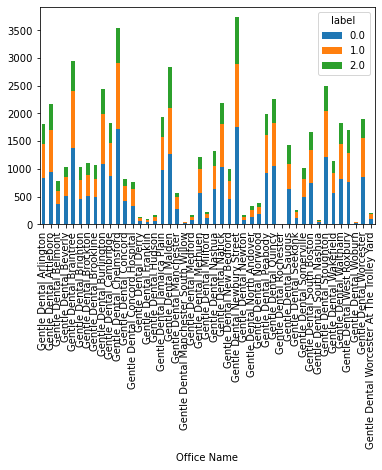

In [24]:
labeledpatient = pd.concat((patient,labels),
                           axis=1)
labeledpatient_1 = labeledpatient.groupby(["Office Name", "label"])["Office Name"].count().unstack('label')
labeledpatient_1.plot(kind='bar', stacked=True)